In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data0 = pd.read_csv('D:/ubantu/data/Metro.csv')
data0.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

Timestamp --> time of data

TP2 --> pressure on the compressor

TP3 --> pressure genrated at Nuemeticpenal

H1 --> Valve that is activated when the pressure read by the pressure switch of the command is above the operating pressure of 10.2 bar (bar).

DV_pressure --> Pressure exerted due to pressure drop generated when air dryers towers discharge the water. When it is equal to zero, the compressor is working under load (bar).

Reservoirs --> Pressure inside the air tanks installed on the trains (bar).

Oil_Temperature --> Temperature of the oil present on the compressor (°C).

Motor_current --> Motor’s current, which should present the following values: (i) close to 0 A when the compressor turns off; (ii) close to 4 A when the compressor is working offloaded; and (iii) close to 7 A.

COMP --> Electrical signal of the air intake valve on the compressor. It is active when there is no admission of air on the compressor, meaning that the compressor turns off or working offloaded.

DV_eletric --> Electrical signal that commands the compressor outlet valve. When it is active, it means that the compressor is working under load; when it is not active, it means that the compressor is off or offloaded.

Towers --> Signal that defines which tower is drying the air and which tower is draining the humidity removed from the air. When it is not active, it means that tower one is working; when it is active, it means that tower two is working.

MPG --> Is responsible for activating the intake valve to start the compressor under load when the pressure in the APU is below 8.2 bar. Consequently, it will activate the sensor COMP, which assumes the same behaviour as the MPG sensor.

LSG --> Signal activated when the pressure is lower than 7 bars.

Pressure_switch --> Signal activated when pressure is detected on the pilot control valve.

Oil_level --> he oil level on the compressor is active (equal to one) when the oil is below the expected values.

Caudal_impulses --> Signal produced by the flowmeter indicating the existence of the flow of air per second.

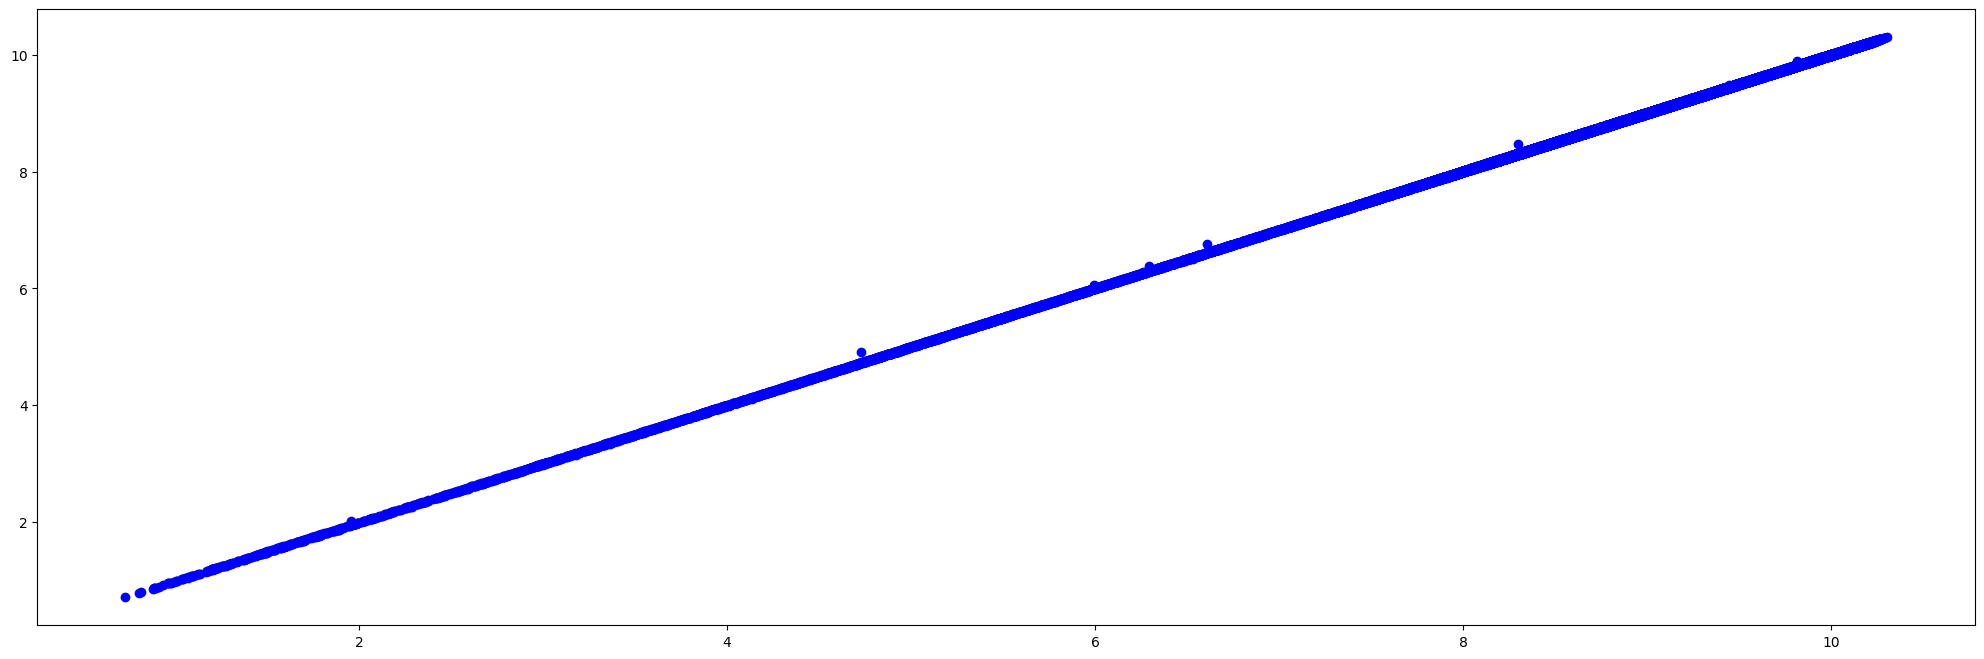

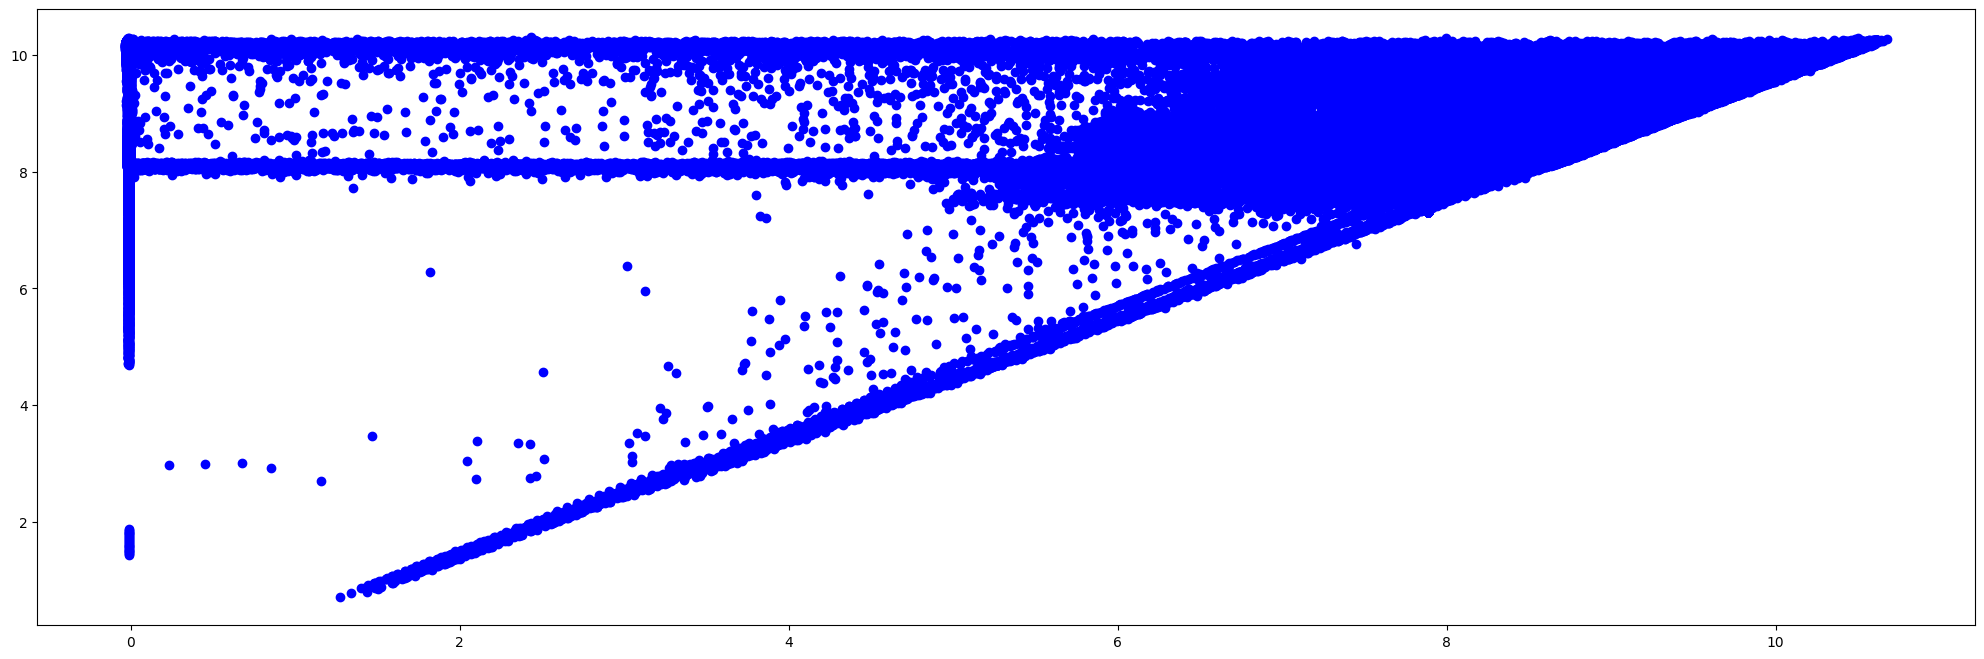

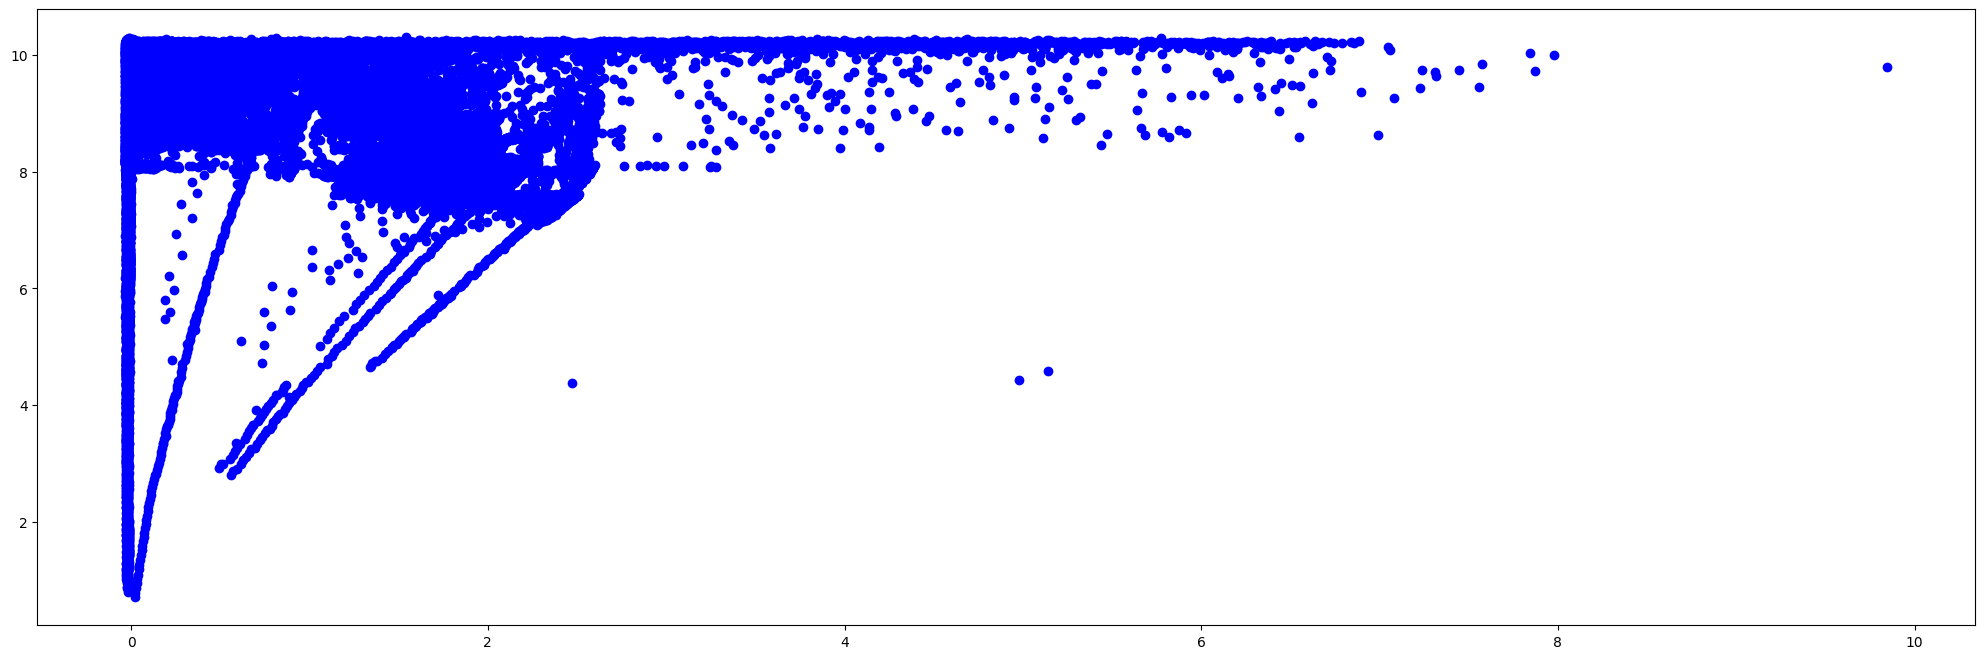

In [49]:
plt.figure(figsize=(25,8))
x = np.array(data0["TP3"])
y = np.array(data0["Reservoirs"])

# plt.plot(x,y)
plt.scatter(x,y,c='blue')
plt.show()

plt.figure(figsize=(25,8))
x = np.array(data0["TP2"])
y = np.array(data0["Reservoirs"])

# plt.plot(x,y)
plt.scatter(x,y,c='blue')
plt.show()


plt.figure(figsize=(25,8))
x = np.array(data0["DV_pressure"])
y = np.array(data0["Reservoirs"])

# plt.plot(x,y)
plt.scatter(x,y,c='blue')
plt.show()

<Axes: >

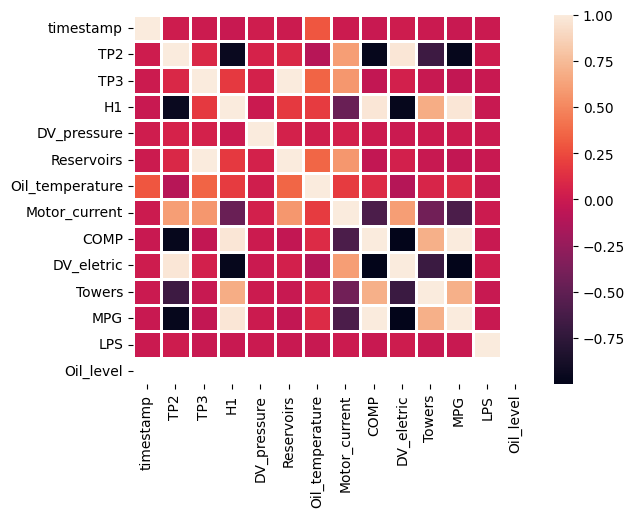

In [68]:
new_df = data[["timestamp", "TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric",
              "Towers", "MPG", "LPS", "Oil_level"]]
sns.heatmap(data=new_df.corr(), lw = 1)

In [80]:
from sklearn.model_selection import train_test_split

# Assuming data0 is your DataFrame containing the relevant columns
X = data0[["TP2", "TP3"]]  # Independent variable
y = data0["Reservoirs"]  # Dependent variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [83]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [84]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.9999882645842181
Mean Squared Error (MSE): 4.781318020190643e-06
Mean Absolute Error (MAE): 0.0016460213315264856


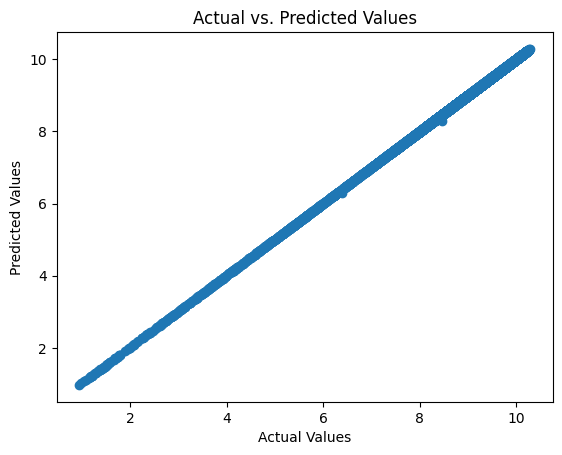

In [85]:
# Create a scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()